# Download NLDAS Data

## Import Dependencies

In [33]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import configparser
import pathlib
import micromet
import xarray as xr

In [34]:
sys.path.append("../../src")
import fluxfootprints

In [35]:
spath = "../../secrets/config.ini"
sconfig = configparser.ConfigParser()
sconfig.read(spath)

ed_pass = sconfig['NLDAS']['pw']
ed_user = sconfig['NLDAS']['user']

To use this part of the module, you must register with the [NASA Earthdata Login Page](https://urs.earthdata.nasa.gov/home). The example below downloads hourly data from the site for North America.

In [36]:
import datetime

#nldas_out_dir = Path('C:/Users/paulinkenbrandt/Documents/GitHub/MicroMet/Notebooks/Footprints')


for date in pd.date_range(start='2021-01-01', end='2021-01-02',freq='h'):
    hour = date.hour
    fluxfootprints.download_nldas(date,
                           hour,
                           ed_user,
                           ed_pass,)

NLDAS_data\2021_01_01_00.nc already exists, not overwriting.
NLDAS_data\2021_01_01_01.nc already exists, not overwriting.
NLDAS_data\2021_01_01_02.nc already exists, not overwriting.
NLDAS_data\2021_01_01_03.nc already exists, not overwriting.
NLDAS_data\2021_01_01_04.nc already exists, not overwriting.
NLDAS_data\2021_01_01_05.nc already exists, not overwriting.
NLDAS_data\2021_01_01_06.nc already exists, not overwriting.
NLDAS_data\2021_01_01_07.nc already exists, not overwriting.
NLDAS_data\2021_01_01_08.nc already exists, not overwriting.
NLDAS_data\2021_01_01_09.nc already exists, not overwriting.
NLDAS_data\2021_01_01_10.nc already exists, not overwriting.
NLDAS_data\2021_01_01_11.nc already exists, not overwriting.
NLDAS_data\2021_01_01_12.nc already exists, not overwriting.
NLDAS_data\2021_01_01_13.nc already exists, not overwriting.
NLDAS_data\2021_01_01_14.nc already exists, not overwriting.
NLDAS_data\2021_01_01_15.nc already exists, not overwriting.
NLDAS_data\2021_01_01_16

<xarray.Dataset> Size: 5MB
Dimensions:      (lon: 464, lat: 224, time: 1, bnds: 2)
Coordinates:
  * lon          (lon) float32 2kB -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * lat          (lat) float32 896B 25.06 25.19 25.31 ... 52.69 52.81 52.94
  * time         (time) datetime64[ns] 8B 2021-01-01
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 16B ...
    Tair         (time, lat, lon) float32 416kB ...
    Qair         (time, lat, lon) float32 416kB ...
    PSurf        (time, lat, lon) float32 416kB ...
    Wind_E       (time, lat, lon) float32 416kB ...
    Wind_N       (time, lat, lon) float32 416kB ...
    LWdown       (time, lat, lon) float32 416kB ...
    CRainf_frac  (time, lat, lon) float32 416kB ...
    CAPE         (time, lat, lon) float32 416kB ...
    PotEvap      (time, lat, lon) float32 416kB ...
    Rainf        (time, lat, lon) float32 416kB ...
    SWdown       (time, lat, lon) float32 416kB ...
Attributes: (12/

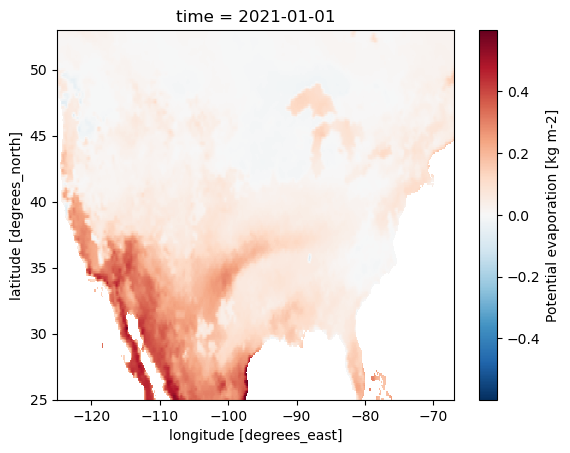

In [37]:
# Load the NetCDF file
ds = xr.open_dataset("./NLDAS_data/2021_01_01_00.nc")

# Inspect the dataset structure
print(ds)

var = ds['PotEvap']

# Plot a 2D slice (e.g., first time step if it has a time dimension)
var.isel(time=0).plot()


This function clips the downloaded data to the boundaries of Utah (USA), and lumps the data into efficient file formats labeled by year.

In [38]:
fluxfootprints.clip_to_utah_merge(file_dir="./NLDAS_data/", years = [2021])


2021
NLDAS_data\2021_01_01_00.nc
NLDAS_data\2021_01_01_01.nc
NLDAS_data\2021_01_01_02.nc
NLDAS_data\2021_01_01_03.nc
NLDAS_data\2021_01_01_04.nc
NLDAS_data\2021_01_01_05.nc
NLDAS_data\2021_01_01_06.nc
NLDAS_data\2021_01_01_07.nc
NLDAS_data\2021_01_01_08.nc
NLDAS_data\2021_01_01_09.nc
NLDAS_data\2021_01_01_10.nc
NLDAS_data\2021_01_01_11.nc
NLDAS_data\2021_01_01_12.nc
NLDAS_data\2021_01_01_13.nc
NLDAS_data\2021_01_01_14.nc
NLDAS_data\2021_01_01_15.nc
NLDAS_data\2021_01_01_16.nc
NLDAS_data\2021_01_01_17.nc
NLDAS_data\2021_01_01_18.nc
NLDAS_data\2021_01_01_19.nc
NLDAS_data\2021_01_01_20.nc
NLDAS_data\2021_01_01_21.nc
NLDAS_data\2021_01_01_22.nc
NLDAS_data\2021_01_01_23.nc
NLDAS_data\2021_01_02_00.nc


PermissionError: [Errno 13] Permission denied: 'c:\\Users\\paulinkenbrandt\\Documents\\GitHub\\footprints\\docs\\notebooks\\2021_utah_merged.nc'

<xarray.Dataset> Size: 2MB
Dimensions:      (time: 25, bnds: 2, lat: 40, lon: 40)
Coordinates:
  * lon          (lon) float32 160B -113.9 -113.8 -113.7 ... -109.2 -109.1
  * lat          (lat) float32 160B 37.06 37.19 37.31 ... 41.69 41.81 41.94
  * time         (time) datetime64[ns] 200B 2021-01-01 ... 2021-01-02
Dimensions without coordinates: bnds
Data variables:
    time_bnds    (time, bnds) datetime64[ns] 400B ...
    Tair         (time, lat, lon) float32 160kB ...
    Qair         (time, lat, lon) float32 160kB ...
    PSurf        (time, lat, lon) float32 160kB ...
    Wind_E       (time, lat, lon) float32 160kB ...
    Wind_N       (time, lat, lon) float32 160kB ...
    LWdown       (time, lat, lon) float32 160kB ...
    CRainf_frac  (time, lat, lon) float32 160kB ...
    CAPE         (time, lat, lon) float32 160kB ...
    PotEvap      (time, lat, lon) float32 160kB ...
    Rainf        (time, lat, lon) float32 160kB ...
    SWdown       (time, lat, lon) float32 160kB ...
Attri

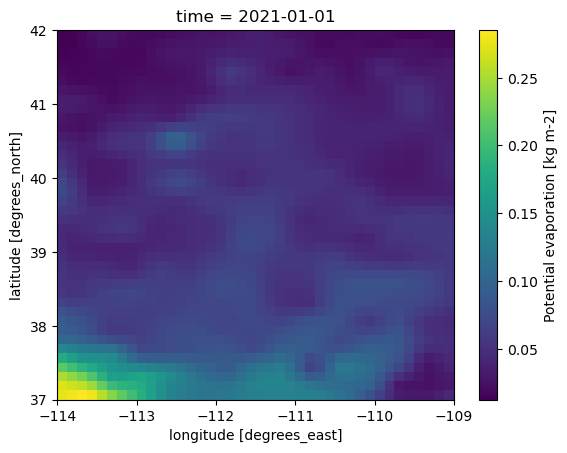

In [ ]:
# Load the NetCDF file
ds = xr.open_dataset("2021_utah_merged.nc")

# Inspect the dataset structure
print(ds)

var = ds['PotEvap']

# Plot a 2D slice (e.g., first time step if it has a time dimension)
var.isel(time=0).plot()

This .nc file includes a variable called ETo (reference evapotranspiration), defined over four dimensions: elevation, time, lat, and lon.

In [ ]:
fluxfootprints.calc_hourly_ffp_xr(input_data_dir=".",
                            years = [2021],
                            output_dir="./output/")

2021


PermissionError: [Errno 13] Permission denied: 'c:\\Users\\paulinkenbrandt\\Documents\\GitHub\\footprints\\docs\\notebooks\\output\\2021_with_eto.nc'

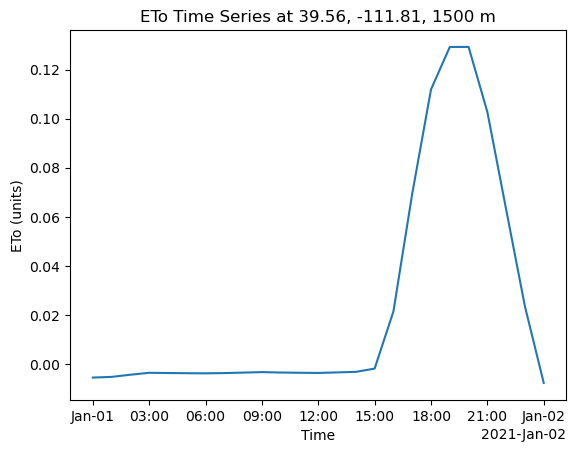

In [ ]:
# Load the NetCDF file
ds = xr.open_dataset("./output/2021_with_eto.nc")

# Target location and elevation
target_lat = 39.5
target_lon = -111.8
target_elev = 1500

# Find nearest indices
lat_idx = ds.lat.sel(lat=target_lat, method="nearest")
lon_idx = ds.lon.sel(lon=target_lon, method="nearest")
elev_idx = ds.elevation.sel(elevation=target_elev, method="nearest")

# Extract the time series
eto_timeseries = ds.ETo.sel(lat=lat_idx, lon=lon_idx, elevation=elev_idx)

# Plot the time series
eto_timeseries.plot()
plt.title(f"ETo Time Series at {float(lat_idx):.2f}, {float(lon_idx):.2f}, {int(elev_idx)} m")
plt.ylabel("ETo (units)")
plt.xlabel("Time")
plt.show()

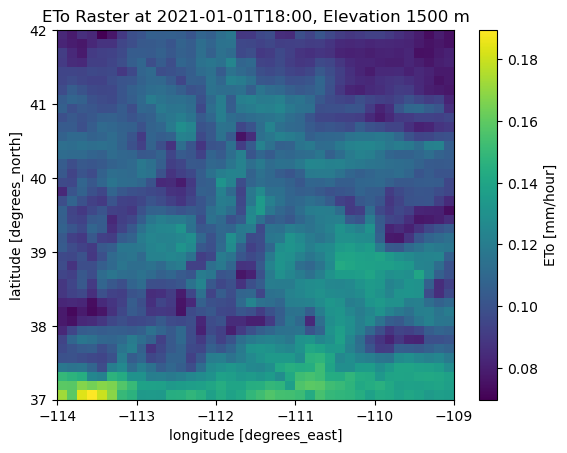

In [ ]:
# Choose time and elevation
time_point = "2021-01-01T18:00"
elev_idx = ds.elevation.sel(elevation=1500, method="nearest")

# Extract the raster
eto_raster = ds.ETo.sel(time=time_point, elevation=elev_idx)

# Plot raster
eto_raster.plot()
plt.title(f"ETo Raster at {time_point}, Elevation {int(elev_idx)} m")
plt.show()

In [ ]:
fluxfootprints.extract_nldas_xr_to_df([2021],
                                      config_path="../../data/station_config/", 
                                      input_path="./output")

US-UTE
US-UTW


In [ ]:
output_path = pathlib.Path("./output/")
eto_df = pd.read_parquet(output_path / 'nldas_all.parquet')
normed_df = fluxfootprints.normalize_eto_df(eto_df)
normed_df.to_parquet(output_path / 'nldas_all_normed.parquet')

In [ ]:
output_path = pathlib.Path("./output/")

gpds = {}

for raster in output_path.glob('*weighted.tif'):

    date = pd.to_datetime(raster.stem.split('_')[0])
    gpds[f"{date:%Y-%m-%d}"] = micromet.outline_valid_cells(raster)

In [ ]:
footprints = pd.concat(gpds)
footprints['stationid'] = 'US-UTW'
footprints = footprints.reset_index().rename(columns={'level_0':'date'}).drop(['level_1'],axis=1)
footprints

In [ ]:
import configparser
config = configparser.ConfigParser()

config.read('../../secrets/config.ini')

from sqlalchemy import create_engine
import urllib.parse
host = config['DEFAULT']['ip']
pw = config['DEFAULT']['pw']
user = config['DEFAULT']['login']

encoded_password = urllib.parse.quote_plus(pw)

def postconn_et(encoded_password, host='localhost',user=user,port='5432',db='groundwater', schema = 'groundwater'):
    connection_text = "postgresql+psycopg2://{:}:{:}@{:}:{:}/{:}?gssencmode=disable".format(user,encoded_password,host,port,db)
    return create_engine(connection_text, connect_args={'options': '-csearch_path={}'.format(schema)})


engine = postconn_et(encoded_password, host=host, user=user)



In [ ]:
footprints.to_file("daily_footprint_areas.geojson",driver="GeoJSON")

In [ ]:
# 3. Export to PostGIS table
table_name = "daily_footprint_areas"
footprints.to_postgis(
    name=table_name,
    con=engine,
    if_exists="replace",   # or "append"
    index=False,           # do not write pandas index as a column
    #geom_col='geometry',     # use a custom geometry column name if desired
)

print(f"GeoDataFrame successfully exported to '{table_name}' in database.")